## Covid 19 Dataset

firstly import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read data

In [2]:
data=pd.read_csv('covid_19_data.csv')

create copy of data

In [3]:
df=data.copy(deep=True)

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


check shape of df

In [5]:
df.shape

(6722, 8)

In [6]:
len(df)

6722

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3953 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.3+ KB


we should change the type of ObservationDate in the next steps

## Data Cleaning

In [8]:
# check column names
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [9]:
# rename columns with list comprehension
df.columns=[  i.lower().replace(' ','_').replace('/','_') for i in df.columns ]

In [10]:
# second way
df.columns.str.lower().str.replace('/','_').str.replace(' ','_')

Index(['sno', 'observationdate', 'province_state', 'country_region',
       'last_update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [11]:
# check
df.columns

Index(['sno', 'observationdate', 'province_state', 'country_region',
       'last_update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [12]:
df.head(3)

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [13]:
df['country_region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

apply lower and strip methods into country_region

In [14]:
df['country_region']=df['country_region'].str.lower().str.strip()

In [15]:
df['country_region'].unique()

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'singapore', 'philippines', 'malaysia',
       'vietnam', 'australia', 'mexico', 'brazil', 'colombia', 'france',
       'nepal', 'canada', 'cambodia', 'sri lanka', 'ivory coast',
       'germany', 'finland', 'united arab emirates', 'india', 'italy',
       'uk', 'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt',
       'iran', 'israel', 'lebanon', 'iraq', 'oman', 'afghanistan',
       'bahrain', 'kuwait', 'austria', 'algeria', 'croatia',
       'switzerland', 'pakistan', 'georgia', 'greece', 'north macedonia',
       'norway', 'romania', 'denmark', 'estonia', 'netherlands',
       'san marino', 'azerbaijan', 'belarus', 'iceland', 'lithuania',
       'new zealand', 'nigeria', 'north ireland', 'ireland', 'luxembourg',
       'monaco', 'qatar', 'ecuador', 'czech republic', 'armenia',
       'dominican republic', 'indonesia', 'portugal', 'andorra', 'latvia',
       'morocco', '

change unwanted values from country_region column

In [16]:
map={
    "('st. martin',)":'st_martin',
    'st. martin':'st_martin',
    'the gambia':'gambia',
    'gambia, the':'gambia',
    'congo (kinshasa)':'congo',
    'congo (brazzaville)':'congo'
}

df['country_region'].replace(map, inplace=True)

C:\Users\Yusif\AppData\Local\Temp\ipykernel_1088\3566217400.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_region'].replace(map, inplace=True)


In [17]:
df['country_region'].unique()

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'singapore', 'philippines', 'malaysia',
       'vietnam', 'australia', 'mexico', 'brazil', 'colombia', 'france',
       'nepal', 'canada', 'cambodia', 'sri lanka', 'ivory coast',
       'germany', 'finland', 'united arab emirates', 'india', 'italy',
       'uk', 'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt',
       'iran', 'israel', 'lebanon', 'iraq', 'oman', 'afghanistan',
       'bahrain', 'kuwait', 'austria', 'algeria', 'croatia',
       'switzerland', 'pakistan', 'georgia', 'greece', 'north macedonia',
       'norway', 'romania', 'denmark', 'estonia', 'netherlands',
       'san marino', 'azerbaijan', 'belarus', 'iceland', 'lithuania',
       'new zealand', 'nigeria', 'north ireland', 'ireland', 'luxembourg',
       'monaco', 'qatar', 'ecuador', 'czech republic', 'armenia',
       'dominican republic', 'indonesia', 'portugal', 'andorra', 'latvia',
       'morocco', '

capitalize country names and replace ' ' with '_'

In [18]:
df['country_region']=[x.replace(' ','_').capitalize() for x in list(df['country_region'])]

In [19]:
# sort values
df['country_region'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua_and_barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia_and_herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina_faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman_islands',
       'Central_african_republic', 'Channel_islands', 'Chile', 'Colombia',
       'Congo', 'Costa_rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech_republic', 'Denmark', 'Djibouti', 'Dominican_republic',
       'Ecuador', 'Egypt', 'Equatorial_guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Faroe_islands', 'Finland', 'France', 'French_guiana',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Guadeloupe', 'Guam', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Holy_see', 'Honduras',
       'Hong_kong', 'Hungary', 'Iceland', '

In [20]:
df

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland_china,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland_china,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland_china,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland_china,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland_china,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto_rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic_of_the_congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [21]:
df.duplicated().sum()

0

In [22]:
df.isnull().sum()

sno                   0
observationdate       0
province_state     2769
country_region        0
last_update           0
confirmed             0
deaths                0
recovered             0
dtype: int64

In [23]:
df.nunique()

sno                6722
observationdate      57
province_state      275
country_region      175
last_update        1637
confirmed           797
deaths              136
recovered           586
dtype: int64

In [24]:
df.head()

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland_china,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland_china,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland_china,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland_china,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland_china,1/22/2020 17:00,0.0,0.0,0.0


check sno column

In [25]:
df['sno'].unique()

array([   1,    2,    3, ..., 6720, 6721, 6722], dtype=int64)

In [26]:
df['sno'].nunique() # id

6722

drop sno column

In [27]:
df.drop('sno',axis=1, inplace=True)

In [28]:
df['observationdate'].nunique()

57

In [29]:
df['observationdate'].unique()

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020'], dtype=object)

In [30]:
# change type of observationdate
df['observationdate']=pd.to_datetime(df['observationdate'])

In [31]:
df['observationdate']

0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
6717   2020-03-18
6718   2020-03-18
6719   2020-03-18
6720   2020-03-18
6721   2020-03-18
Name: observationdate, Length: 6722, dtype: datetime64[ns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   observationdate  6722 non-null   datetime64[ns]
 1   province_state   3953 non-null   object        
 2   country_region   6722 non-null   object        
 3   last_update      6722 non-null   object        
 4   confirmed        6722 non-null   float64       
 5   deaths           6722 non-null   float64       
 6   recovered        6722 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 367.7+ KB


In [33]:
# df.drop('last_update','contry_region','province_state', axis=1)
# this code will return an error

drop useless columns

In [34]:
df.drop(['last_update','country_region','province_state'], axis=1, inplace=True)


In [35]:
df

,observationdate,confirmed,deaths,recovered
0,2020-01-22,1.0,0.0,0.0
1,2020-01-22,14.0,0.0,0.0
2,2020-01-22,6.0,0.0,0.0
3,2020-01-22,1.0,0.0,0.0
4,2020-01-22,0.0,0.0,0.0
...,...,...,...,...
6717,2020-03-18,0.0,0.0,0.0
6718,2020-03-18,0.0,0.0,0.0
6719,2020-03-18,0.0,0.0,0.0
6720,2020-03-18,0.0,0.0,0.0


In [36]:
df=df.groupby('observationdate').sum().reset_index()
# group observationdate and find sum of other columns
# then reset_index because of we want to see observation date like column

In [37]:
df

,observationdate,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0
5,2020-01-27,2927.0,82.0,61.0
6,2020-01-28,5578.0,131.0,107.0
7,2020-01-29,6165.0,133.0,126.0
8,2020-01-30,8235.0,171.0,143.0
9,2020-01-31,9925.0,213.0,222.0


In [38]:
df.sample(5)

,observationdate,confirmed,deaths,recovered
6,2020-01-28,5578.0,131.0,107.0
0,2020-01-22,555.0,17.0,28.0
5,2020-01-27,2927.0,82.0,61.0
51,2020-03-13,145193.0,5404.0,70251.0
47,2020-03-09,113582.0,3996.0,62512.0


check correlation matrix

In [39]:
df.corr()

,observationdate,confirmed,deaths,recovered
observationdate,1.000000,0.960572,0.935775,0.951418
confirmed,0.960572,1.000000,0.988558,0.936283
deaths,0.935775,0.988558,1.000000,0.952893
recovered,0.951418,0.936283,0.952893,1.000000


correlation matrix visual


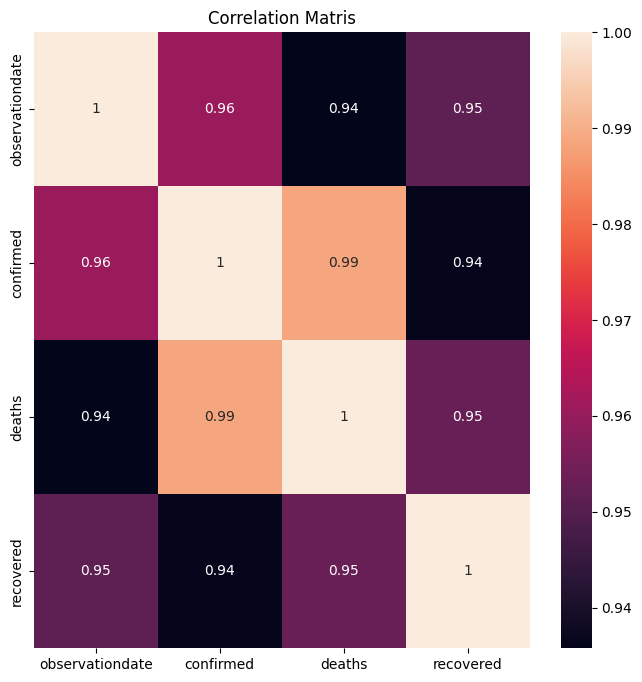

In [40]:
plt.figure(figsize=(8,8))
corr_heatmap=sns.heatmap(df.corr(),annot=True)
corr_heatmap.set_title('Correlation Matris')
plt.show()

In [41]:
df.head()

,observationdate,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0


change observation date into numbers 

In [42]:
df['observationdate']=range(1,58)
#range(1,df.shape[0]+1)

In [43]:
df.head(3)

,observationdate,confirmed,deaths,recovered
0,1,555.0,17.0,28.0
1,2,653.0,18.0,30.0
2,3,941.0,26.0,36.0


## Feature engineering

In [44]:
df['infected'] = df['confirmed'] - (df['recovered'] + df['deaths'])

In [45]:
df.head()

,observationdate,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


## Deaths prediction


define x and y


In [46]:
x=df[['observationdate']]
y=df['deaths']

split data into train and test


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.12, shuffle=False, random_state=13)
# shuffle shoud be false. it's serial data

In [48]:
x_train.shape

(50, 1)

In [49]:
x_test

,observationdate
50,51
51,52
52,53
53,54
54,55
55,56
56,57


visualization

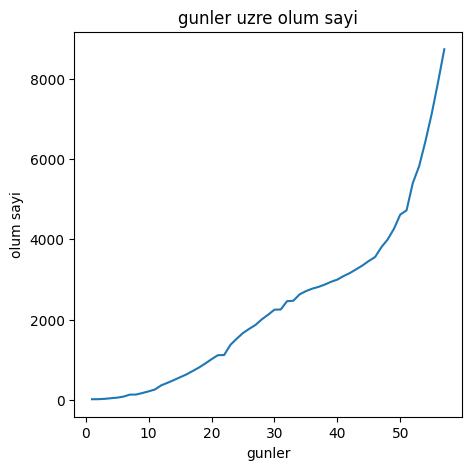

In [50]:
plt.figure(figsize=(5,5))
sns.lineplot(x=df['observationdate'],y=df['deaths'])
plt.xlabel('gunler')
plt.ylabel('olum sayi')
plt.title('gunler uzre olum sayi')
plt.show()

create a function for data visualization

In [51]:
def gunlere_gore_deyisimler(y_sutun_adi):
    plt.figure(figsize=(5,5))
    sns.lineplot(x=df['observationdate'],y=df[y_sutun_adi])
    plt.show()

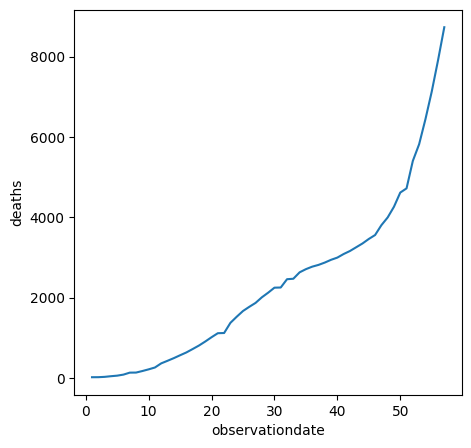

In [52]:
gunlere_gore_deyisimler('deaths')

model creation


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
r2_skor = r2_score(y_test, y_pred)
r2_skor

-2.5862765208841862

optimize model

In [54]:
ls_r2_score = []

for i in np.arange(3, 10, 0.01):
    linear_model = LinearRegression()
    linear_model.fit(x_train**i, y_train)
    y_pred = linear_model.predict(x_test**i)
    r2_skor = r2_score(y_test, y_pred)
    ls_r2_score.append((r2_skor,i))

max_r2_score = max(ls_r2_score)
max_r2_score

(0.8614387944952728, 3.9499999999999797)

create model with best power(i)

In [55]:

linear_model=LinearRegression()
linear_model.fit(x_train**max_r2_score[1], y_train)
y_pred=linear_model.predict(x_test**max_r2_score[1])

predicted values

In [56]:
y_pred

array([5538.77459847, 5914.88380541, 6312.9461562 , 6733.79236271,
       7178.26816171, 7647.23430083, 8141.56652476])

In [57]:
linear_model.coef_

array([0.00084888])

In [58]:
linear_model.intercept_

820.8771869800626

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8614387944952728

check overfit

In [60]:
y_pred_train=linear_model.predict(x_train**max_r2_score[1])
r2_score(y_train,y_pred_train)

0.8173819834734685

In [61]:
# pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['predicted_deaths']).reset_index(drop=True)], axis=1)
y_pred_df = pd.DataFrame({"Death":y_test, "predict_death":y_pred})
y_pred_df

,Death,predict_death
50,4720.0,5538.774598
51,5404.0,5914.883805
52,5819.0,6312.946156
53,6440.0,6733.792363
54,7126.0,7178.268162
55,7905.0,7647.234301
56,8733.0,8141.566525


In [62]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

431.26632270284216

visualize data

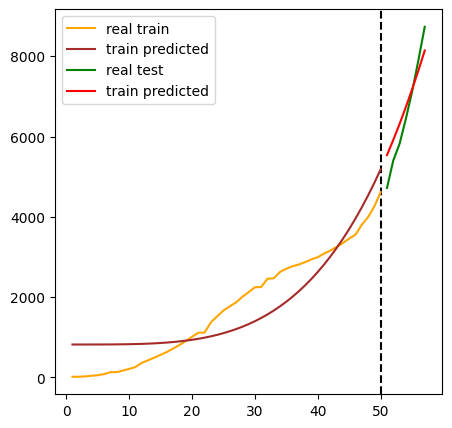

In [63]:
plt.figure(figsize=(5,5))
plt.axvline(50, linestyle='--',color='black')
plt.plot(x_train, y_train, label='real train', color='orange')
plt.plot(x_train, y_pred_train, label='train predicted', color='brown')
plt.plot(x_test, y_test, label='real test', color='green')
plt.plot(x_test, y_pred, label='train predicted', color='red')


plt.legend()
plt.show()

create a function which visualizes predictions

In [64]:
def texminleri_vizuallasdir():
    plt.figure(figsize=(5,5))
    plt.axvline(50, linestyle='--',color='black')
    plt.plot(x_train, y_train, label='train real', color='orange')
    plt.plot(x_train, y_pred_train, label='train predicted', color='brown')
    plt.plot(x_test, y_test, label='real test', color='green')
    plt.plot(x_test, y_pred, label='train predicted', color='red')
    plt.legend()
    plt.show()

use created function

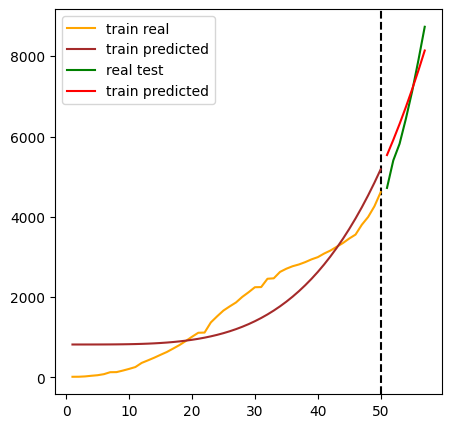

In [65]:
texminleri_vizuallasdir()

## Recovered texmini

In [66]:
x=df[['observationdate']]
y=df['recovered']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.12, shuffle=False)

In [68]:
y.head()

0    28.0
1    30.0
2    36.0
3    39.0
4    52.0
Name: recovered, dtype: float64

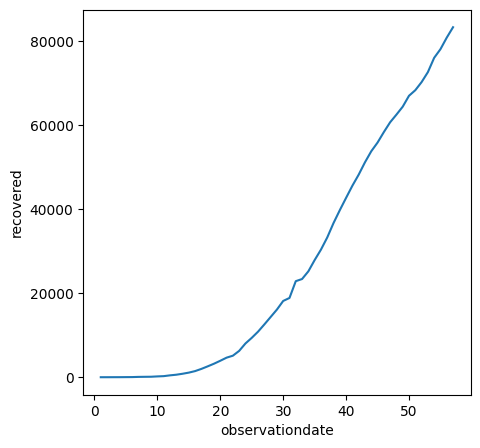

In [69]:
gunlere_gore_deyisimler('recovered')

In [70]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [71]:
r2_score(y_test, y_pred)

-8.274909841455694

In [72]:
x_train.head(2)

,observationdate
0,1
1,2


In [73]:
y_train.head(3)

0    28.0
1    30.0
2    36.0
Name: recovered, dtype: float64

In [74]:
ls_r2_score = []

for i in np.arange(1,3,0.01):
    linear_model = LinearRegression()
    linear_model.fit(x_train**i, y_train)
    y_pred = linear_model.predict(x_test**i)
    r2_skor = r2_score(y_test, y_pred)
    ls_r2_score.append((r2_skor,i))

max_r2_score = max(ls_r2_score)
max_r2_score

(0.991829958794207, 1.8100000000000007)

In [75]:
linear_model = LinearRegression()
linear_model.fit(x_train**max_r2_score[1], y_train)
y_pred = linear_model.predict(x_test**max_r2_score[1])
r2_skor = r2_score(y_test, y_pred)
r2_skor

0.991829958794207

In [76]:
mean_absolute_error(y_test, y_pred)

368.0097659055942

overfit check

In [77]:
y_pred_train=linear_model.predict(x_train**max_r2_score[1])
r2_score(y_train,y_pred_train)

0.9733092858835694

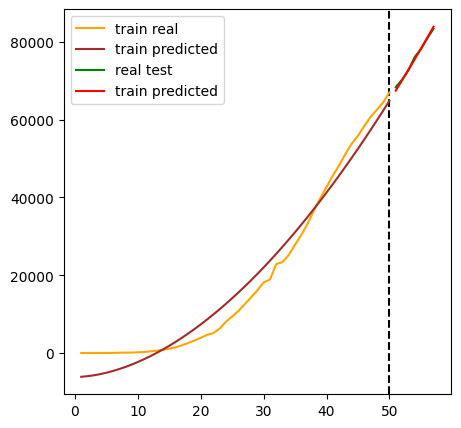

In [78]:
texminleri_vizuallasdir()

## Confirmed texmini


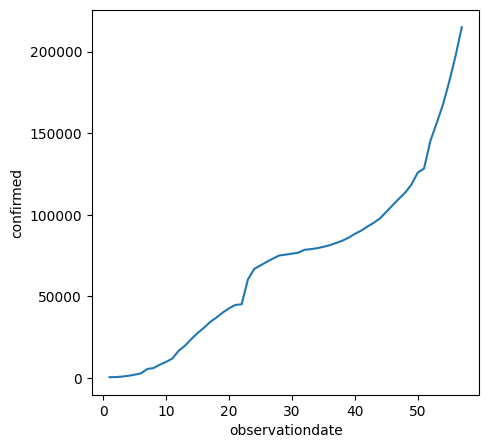

In [79]:
gunlere_gore_deyisimler('confirmed')

In [80]:
y=df['confirmed']

In [81]:
x.head(3)

,observationdate
0,1
1,2
2,3


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.12, shuffle=False)

In [83]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
r2_skor = r2_score(y_test, y_pred)
r2_skor

-1.7404685048052597

In [84]:
ls_r2_score = []

for i in np.arange(1,10,0.01):
    linear_model = LinearRegression()
    linear_model.fit(x_train**i, y_train)
    y_pred = linear_model.predict(x_test**i)
    r2_skor = r2_score(y_test, y_pred)
    ls_r2_score.append((r2_skor,i))

max_r2_score = max(ls_r2_score)
max_r2_score

(0.8286792380219224, 3.2100000000000017)

In [85]:
linear_model = LinearRegression()
linear_model.fit(x_train**max_r2_score[1], y_train)
y_pred = linear_model.predict(x_test**max_r2_score[1])
r2_skor = r2_score(y_test, y_pred)
round(r2_skor,2)

0.83

In [86]:
mean_absolute_error(y_test, y_pred)

9805.884311367217

In [87]:
y_pred_train=linear_model.predict(x_train**max_r2_score[1])
r2_score(y_train,y_pred_train)

0.7608572741468528

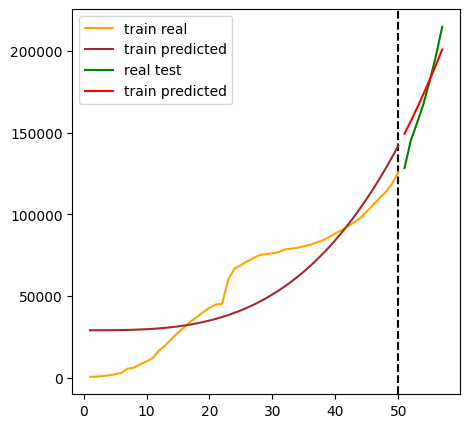

In [88]:
texminleri_vizuallasdir()

In [89]:
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['predicted']).reset_index(drop=True)], axis=1)

,confirmed,predicted
0,128343.0,149387.713591
1,145193.0,157127.664678
2,156099.0,165203.651695
3,167447.0,173623.509549
4,181546.0,182395.104255
5,197168.0,191526.332482
6,214915.0,201025.121107


## Infected Prediction


In [90]:
x=df[['observationdate']]
y=df['infected']

In [91]:
df.head()

,observationdate,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


In [92]:
x_train=df.iloc[:50,0]
x_train.head()
# x should be dataframe 

0    1
1    2
2    3
3    4
4    5
Name: observationdate, dtype: int64

In [93]:
x_train=df.iloc[:50,[0]]

In [94]:
x_train.shape

(50, 1)

In [95]:
x_test=df.iloc[-7:,[0]]

In [96]:
x_test

,observationdate
50,51
51,52
52,53
53,54
54,55
55,56
56,57


In [97]:
df.head()

,observationdate,confirmed,deaths,recovered,infected
0,1,555.0,17.0,28.0,510.0
1,2,653.0,18.0,30.0,605.0
2,3,941.0,26.0,36.0,879.0
3,4,1438.0,42.0,39.0,1357.0
4,5,2118.0,56.0,52.0,2010.0


In [98]:
y_train=df.iloc[:50,4]

In [99]:
y_test=df.iloc[50:,4]

In [100]:
y_test

50     55299.0
51     69538.0
52     77656.0
53     84973.0
54     96332.0
55    108423.0
56    122869.0
Name: infected, dtype: float64

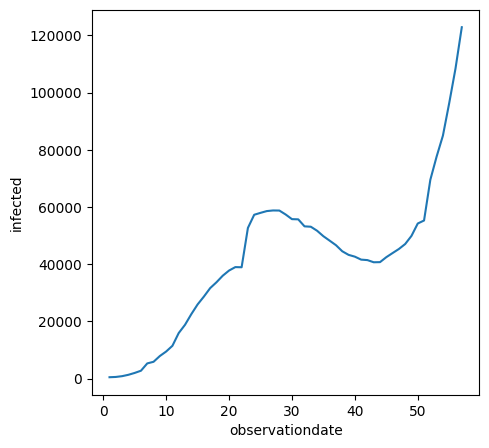

In [101]:
gunlere_gore_deyisimler('infected')

In [102]:
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_infected=linear_model.predict(x_test)
y_pred_infected

array([62233.86122449, 63285.21891957, 64336.57661465, 65387.93430972,
       66439.2920048 , 67490.64969988, 68542.00739496])

In [103]:
r2_score(y_test, y_pred_infected)

-0.9106120437965961

In [104]:
ls_r2_score = []

for i in np.arange(1,10,0.01):
    linear_model = LinearRegression()
    linear_model.fit(x_train**i, y_train)
    y_pred = linear_model.predict(x_test**i)
    r2_skor = r2_score(y_test, y_pred)
    ls_r2_score.append((r2_skor,i))

best_parameter= max(ls_r2_score)
best_parameter

(0.9815088299950573, 9.840000000000007)

In [120]:
linear_model = LinearRegression()
linear_model.fit(x_train**best_parameter[1], y_train)
y_pred = linear_model.predict(x_test**best_parameter[1])
y_pred

array([ 62931.27733093,  69256.84383991,  76754.29998852,  85612.31242694,
        96045.52392612, 108297.5477627 , 122644.24273222])

In [122]:
pd.DataFrame({'real':y_test, 'predicted':y_pred})

,real,predicted
50,55299.0,62931.277331
51,69538.0,69256.843840
52,77656.0,76754.299989
53,84973.0,85612.312427
54,96332.0,96045.523926
55,108423.0,108297.547763
56,122869.0,122644.242732


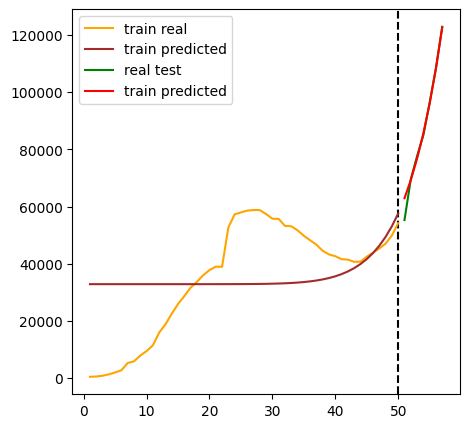

In [128]:
texminleri_vizuallasdir()

underfit

We can achieve better results with time series models

## Thanks